In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [5]:
data=pd.read_csv('/content/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
data=data[["v1","v2"]]
print(data.isnull().sum())

v1    0
v2    0
dtype: int64


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
data.duplicated().sum()

403

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
y=data.iloc[:,0]
x=data.iloc[:,1]
y = y.map({'spam': 1, 'ham': 0})

<ipython-input-11-38ceddb53b58>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='Set1')


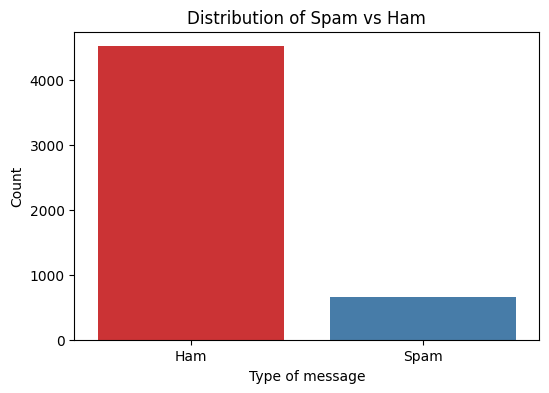

In [11]:
counts = y.value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=counts.index, y=counts.values, palette='Set1')
plt.title('Distribution of Spam vs Ham')
plt.xlabel('Type of message')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [12]:
def cleaning_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z]', ' ', text)
    text = ' '.join(text.split())
    return text
x = x.apply(cleaning_text)

In [13]:
x[2]

'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s'

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=0)

In [15]:
tfidf=TfidfVectorizer(stop_words='english')
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

In [16]:
lr=LogisticRegression()
lr.fit(X_train_tfidf, y_train)
y_pred=lr.predict(X_test_tfidf)

In [17]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


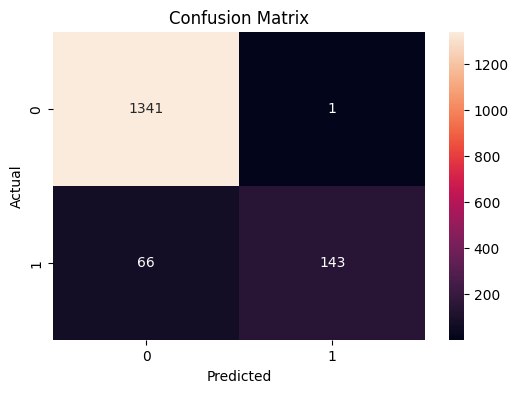

In [18]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [19]:
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Precision: ',precision_score(y_test, y_pred))
print('Recall: ',recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))

Accuracy:  0.9568020631850419
Precision:  0.9930555555555556
Recall:  0.6842105263157895
F1 Score:  0.8101983002832861
